# 最終レポート(提出期限6/7(Wed.))

**必ず名前と学籍番号を書くこと**

名前：

学籍番号：

## 0 注意
最終レポートは、記述回答を主とする。問1にpythonコードの実行例があるが、この結果をそのまま使って、記述回答をする。

## 1 顧客クラスタリングと解釈(10点)

顧客データをもとに、クラスタリングを行い、クラスタ数を変えてクラスタがどう変化するかを確認せよ(5点)。クラスタ毎に、どのような集団であるかの説明を試みよ(5点)。


あるE-commerceサイトでの、１年間の収入(INCOME)と、そのサイトでの支出(SPEND)の300人分のデータを使い、この３００人の顧客をクラスタリングで、複数の塊（クラスタ）に分離して、各クラスタ内の性質について考察する

In [1]:
#
#Load the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Plot styling
import seaborn as sns; sns.set()  # for plot styling
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

#Read the csv file
dataset=pd.read_csv('https://raw.githubusercontent.com/sowmyacr/kmeans_cluster/master/CLV.csv')
#Explore the dataset
dataset.head()#top 5 columns
len(dataset) # of rows
#descriptive statistics of the dataset
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
INCOME,303.0,245.273927,48.499412,126.0,211.0,240.0,274.0,417.0
SPEND,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0


可視化をしてみます。

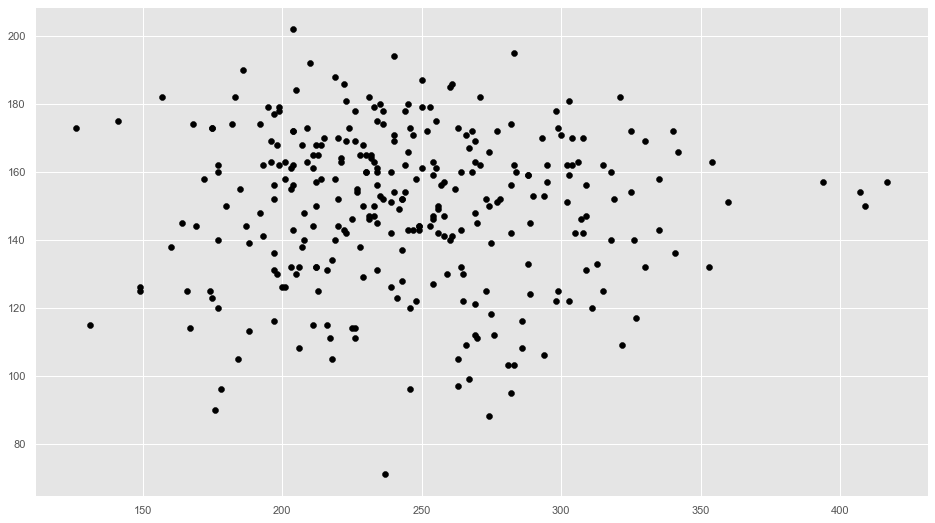

In [2]:
plt.scatter(dataset.INCOME,dataset.SPEND,color='black')

INCOME,SPEND毎に傾向（分布）を見ます

c:\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Income / spend')

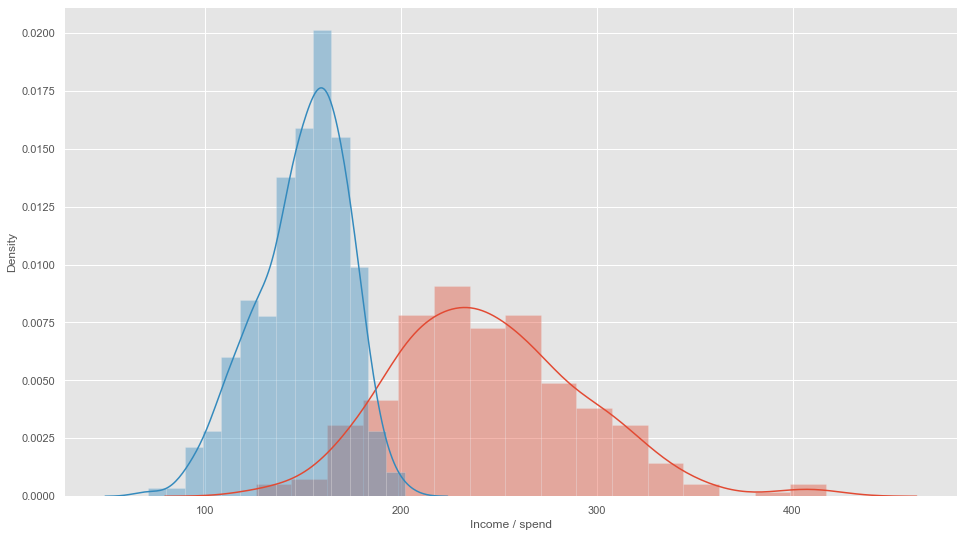

In [3]:
#Visualizing the data - displot
plot_income = sns.distplot(dataset["INCOME"])
plot_spend = sns.distplot(dataset["SPEND"])
#plot_income = sns.displot(dataset["INCOME"])
#plot_spend = sns.displot(dataset["SPEND"])
plt.xlabel('Income / spend')

クラスタリング結果の良し悪しは、クラスタ内平方和（Within-Cluster Sum of Squares:WCSS）を計算することで、定量的に評価することができます

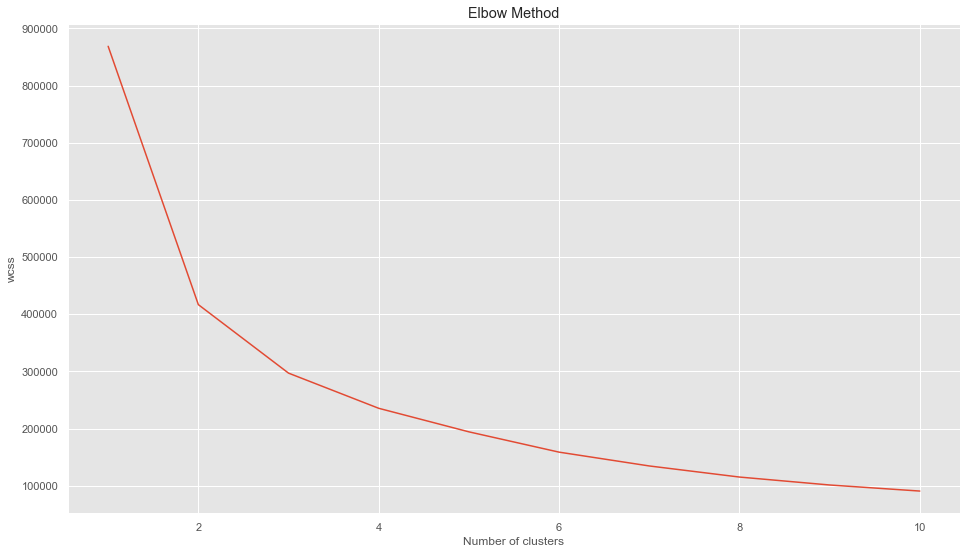

In [5]:
X=dataset.values

#Using the elbow method to find the optimum number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

クラスタ数が大きくなるに従い、WCSSは現象するが、K=4あたりまで急激にさがり、あとはゆっくり現象することがわかる。

Kをどうするかは、その問題領域での知識や、可視化結果から判断することになる。

K=4でクラスタリングしてみる

In [6]:
##Fitting kmeans to the dataset with k=4
K=4
km4=KMeans(n_clusters=K,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(X)


y_meansは、入力データ（配列）に対するクラスタ分けの結果(0,..,K-1)である。

In [7]:
y_means

array([3, 3, 2, 3, 1, 2, 1, 3, 2, 2, 3, 0, 3, 2, 3, 2, 1, 0, 3, 3, 3, 3,
       3, 0, 2, 1, 2, 2, 1, 2, 2, 2, 3, 3, 2, 2, 1, 3, 3, 1, 1, 3, 2, 0,
       1, 1, 3, 3, 2, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 1, 0, 1, 2, 2, 2, 2,
       2, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 1, 1, 1, 0, 3, 3, 2,
       2, 0, 3, 2, 3, 1, 2, 0, 1, 3, 1, 3, 3, 0, 2, 3, 2, 2, 0, 3, 3, 3,
       1, 2, 1, 2, 3, 2, 2, 2, 2, 3, 1, 3, 3, 3, 2, 2, 2, 3, 2, 0, 2, 3,
       1, 3, 1, 3, 2, 2, 2, 0, 1, 1, 2, 2, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3,
       2, 2, 3, 2, 2, 3, 3, 1, 2, 2, 2, 0, 0, 3, 3, 2, 3, 3, 1, 3, 2, 2,
       3, 1, 2, 0, 1, 0, 1, 3, 0, 1, 3, 0, 3, 2, 1, 2, 2, 0, 2, 1, 3, 3,
       0, 3, 2, 0, 0, 3, 2, 3, 3, 3, 2, 2, 3, 0, 2, 1, 3, 1, 0, 1, 0, 3,
       1, 0, 3, 0, 0, 2, 0, 2, 1, 1, 3, 0, 1, 0, 1, 1, 1, 1, 1, 3, 0, 3,
       2, 0, 2, 3, 1, 0, 3, 3, 1, 3, 0, 1, 0, 1, 0, 2, 3, 3, 3, 3, 0, 3,
       2, 2, 1, 2, 0, 0, 3, 3, 0, 3, 0, 2, 0, 0, 1, 2, 1, 2, 2, 3, 2, 1,
       2, 3, 1, 2, 2, 1, 3, 2, 2, 2, 2, 2, 0, 0, 2,

クラスタリング結果でk番目のクラスタを得るには(k=0,...,K-1)

X[y_means==k,0]

In [8]:
X[y_means==0]

array([[275, 139],
       [226, 114],
       [243, 137],
       [264, 143],
       [265, 130],
       [265, 122],
       [248, 122],
       [226, 111],
       [270, 145],
       [234, 131],
       [269, 121],
       [263, 105],
       [286, 108],
       [229, 129],
       [276, 112],
       [225, 114],
       [243, 128],
       [266, 109],
       [282, 142],
       [267,  99],
       [258, 141],
       [270, 111],
       [260, 140],
       [263,  97],
       [254, 127],
       [217, 111],
       [288, 133],
       [239, 126],
       [281, 103],
       [289, 124],
       [246,  96],
       [269, 112],
       [274,  88],
       [246, 120],
       [294, 106],
       [273, 125],
       [259, 130],
       [282,  95],
       [286, 116],
       [283, 103],
       [237,  71],
       [275, 118],
       [218, 105],
       [261, 141],
       [241, 123],
       [264, 132]], dtype=int64)

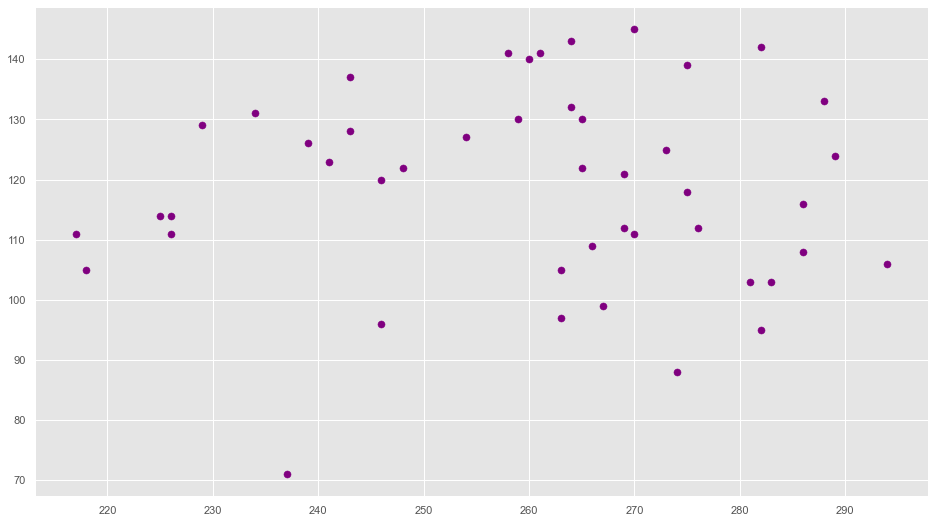

In [9]:
#さらにINCOME,SPENDをクラスタ毎にとりだすにはX[y_means=k,0や1]とすればよいので
#例えばクラスタ0をプロットしてみる。
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')

K個のクラスタと、その重心をまとめてプロットしてみる。

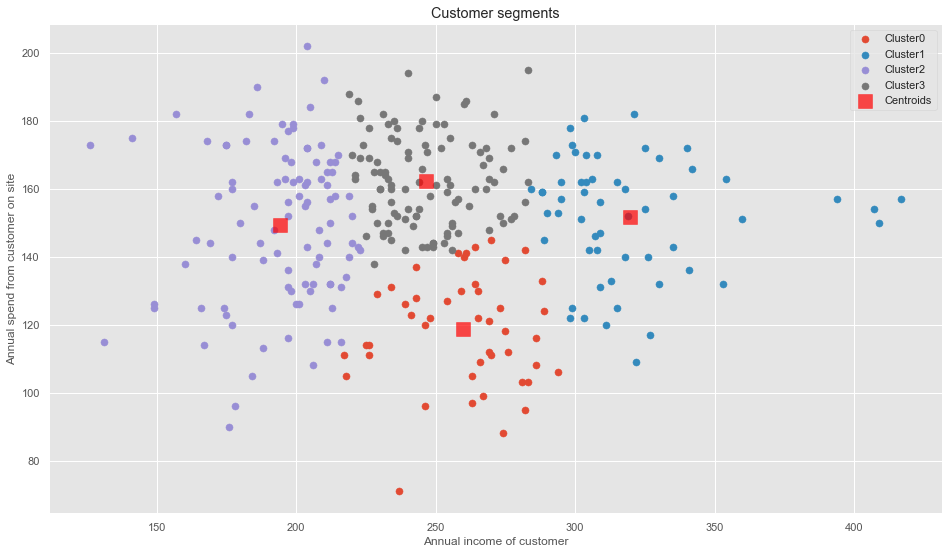

In [10]:
#Visualizing the clusters for k
for i in range(K):
    plt.scatter(X[y_means==i,0],X[y_means==i,1],s=50, label='Cluster{}'.format(i))

plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()
plt.show()

以上の可視化から、顧客のクラスタ分け（セグメンテーション）に関して、以下の知見をえる。

- クラスタ0は収入は中、支出は小
- クラスタ1は収入は大
- クラスタ2は収入は小
- クラスタ3は収入は中、支出は大

のように分類できる。この分類（顧客セグメンテーション）に従って、販売戦略を立てることができる。


K=6としてみると、もう少しセグメンテーションが細かくなることがわかる。

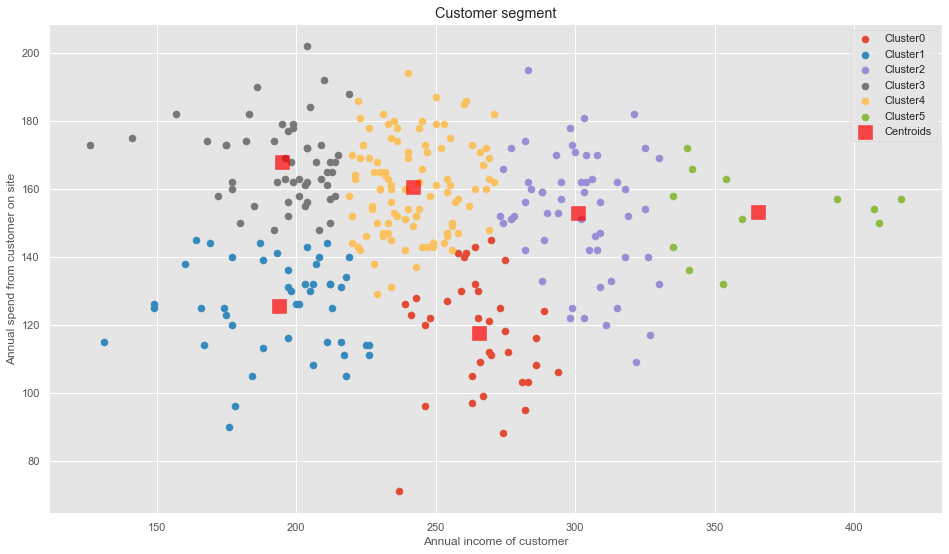

In [11]:
K=6
km4=KMeans(n_clusters=K,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(X)

for i in range(K):
    plt.scatter(X[y_means==i,0],X[y_means==i,1],s=50, label='Cluster{}'.format(i))

#Visualizing the clusters for k=4
plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segment')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()
plt.show()

### 課題1:
- K=6のときの、顧客クラスタ毎にその性質を考察せよ(5点)
- クラスタ分けに基づき、考えらえれる販売戦略（ターゲットと売り方）を考察せよ(5点)

 <u>クラスタの性質</u>:

 <u>販売戦略の考察</u>:


## 2 データ分析のプロセス(記述問題、20点)

### 課題２：
第１回講義「データ分析のプロセスの例」(P12)に従い、

1. 仮想的なプロジェクト、あるいは、講義で紹介した事例やレポート課題を参考に、1～7に相当する具体的な活動内容をそれぞれ書き出せ（各々1～2行程度で）(14点)
   -  例）　溶接の不具合を事前に見つけることで、損失を削減したい。外れ値を削除し、欠損値を補完する。等
2. 1で作成した仮想的なデータ分析のシナリオに対して、予想しうる、課題や、問題点を２つ列挙せよ(6点)


#### 解答欄2-1:

1. ビジネスの理解<br>
   （ここに記述）
2. データの理解<br>
   (ここに記述）
3. データの準備<br>
   (ここに記述）
4. モデル作成<br>
   (ここに記述）
5. 評価<br>
   (ここに記述）
6. 展開<br>
   (ここに記述）
7. モニター<br>
   (ここに記述）

#### 解答欄2-2

- (ここに記述）
- (ここに記述）


## 3 「データサイエンス特論」の振り返り(10点)
### 課題３:
データサイエンス特論で学んだ項目について**１つ**を選択し、振り返りを実施せよ。

項目一覧：
- 回帰分析、パターン認識、動的システム、時系列分析、周波数分析、画像処理、メディア情報処理、位置情報処理、センサー情報処理、jupyter notebookの使い方、Python、AIの品質保証、AIの規制、ChatGPT

選択結果と点数は連動しない、埋めれば10点を付与する。
- どの項目を選択したか
  - (ここに解答)
- どれだけ理解できたか
  - （ここに解答)
- どのように役に立ちそうか
  - (ここに解答)
- さらなる学びの方向性
  - (ここに解答)